In [781]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage



In [782]:
from ucimlrepo import fetch_ucirepo 
  

heart_disease = fetch_ucirepo(id=45) 

df = heart_disease.data.original


# cleaning 

In [783]:

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

C:\Users\PC\AppData\Local\Temp\ipykernel_2392\4267255269.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [784]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

---------------------------------------------------------------------------------------------------------------------------------------------------------------------

# EDA 

### age column

In [785]:
df['age'].value_counts().isna().sum()

np.int64(0)

In [786]:
df['age'].astype(np.int64)

0      63
1      67
2      67
3      37
4      41
       ..
298    45
299    68
300    57
301    57
302    38
Name: age, Length: 303, dtype: int64

In [787]:
df['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [788]:
df["age"].astype(int)

0      63
1      67
2      67
3      37
4      41
       ..
298    45
299    68
300    57
301    57
302    38
Name: age, Length: 303, dtype: int64

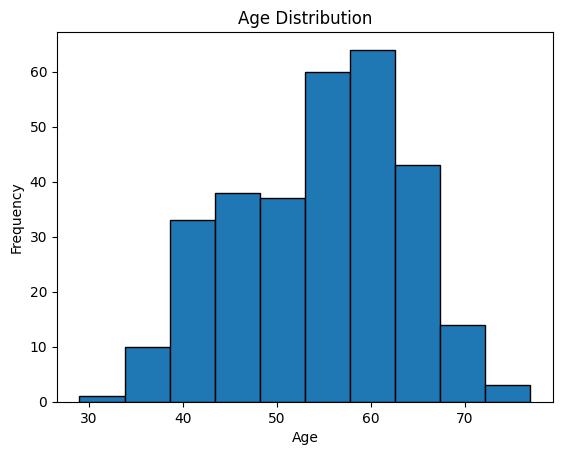

In [789]:
plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### sex column

In [790]:
df['sex'].value_counts().isna().sum()   

np.int64(0)

In [791]:
df['sex'].astype(np.int64)

0      1
1      1
2      1
3      1
4      0
      ..
298    1
299    1
300    1
301    0
302    1
Name: sex, Length: 303, dtype: int64

In [792]:
df['sex'].describe()

count    303.000000
mean       0.679868
std        0.467299
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

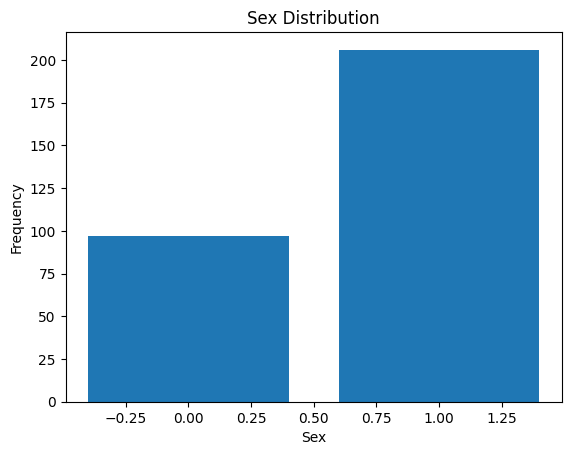

In [793]:
plt.bar(df['sex'].value_counts().index, df['sex'].value_counts().values)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()


male is more than females

### cp (chest pain type) column


In [794]:
df['cp'].value_counts().isna().sum()    

np.int64(0)

In [795]:
df['cp'].value_counts()

cp
4    144
3     86
2     50
1     23
Name: count, dtype: int64

In [796]:
df['cp'].astype(np.int64)

0      1
1      4
2      4
3      3
4      2
      ..
298    1
299    4
300    4
301    2
302    3
Name: cp, Length: 303, dtype: int64

In [797]:
df['cp'].describe()

count    303.000000
mean       3.158416
std        0.960126
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: cp, dtype: float64

([<matplotlib.patches.Wedge at 0x2e4adf3ab90>,
 [Text(0.08545211008447422, 1.096675857709155, '4'),
  Text(-0.8151659691308484, -0.7385827257463887, '3'),
  Text(0.5986247673245755, -0.9228479766167329, '2'),
  Text(1.0688704764987331, -0.2598382274981324, '1')],
 [Text(0.046610241864258654, 0.5981868314777209, '47.5%'),
  Text(-0.44463598316228087, -0.4028633049525756, '28.4%'),
  Text(0.3265226003588593, -0.503371623609127, '16.5%'),
  Text(0.5830202599083999, -0.14172994227170857, '7.6%')])

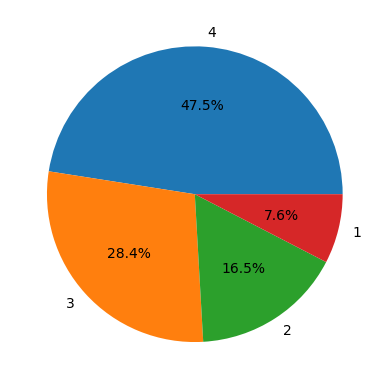

In [798]:
plt.pie(df['cp'].value_counts().values, labels=df['cp'].value_counts().index, autopct='%1.1f%%')    

        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
        

### trestbps: resting blood pressure (in mm Hg on admission to the hospital) column



In [799]:
df['trestbps'].isna().sum()  

np.int64(0)

In [800]:
df['trestbps'].describe()

count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [801]:
# df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean()).astype(np.int64)

In [802]:
df['trestbps'].isna().sum()

np.int64(0)

{'whiskers': [<matplotlib.lines.Line2D at 0x2e4addca250>,
 'caps': [<matplotlib.lines.Line2D at 0x2e4adf10590>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e4addca0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2e4adf12090>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e4adf11a50>],
 'means': []}

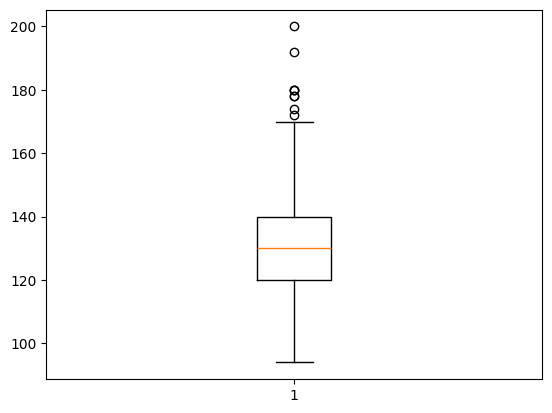

In [803]:
plt.boxplot(df['trestbps'])

In [804]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper and lower bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Replace outliers with upper or lower limit (capping)
df['trestbps'] = np.where(df['trestbps'] > upper_limit, upper_limit,
                         np.where(df['trestbps'] < lower_limit, lower_limit, df['trestbps']))


(array([ 7., 13., 32., 56., 63., 34., 44., 25., 14., 15.]),
 array([ 94. , 101.6, 109.2, 116.8, 124.4, 132. , 139.6, 147.2, 154.8,
        162.4, 170. ]),
 <BarContainer object of 10 artists>)

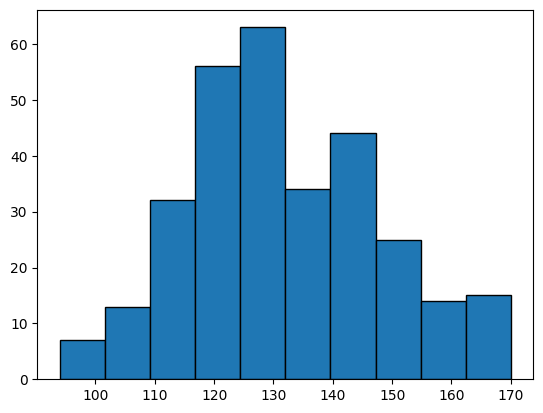

In [805]:
plt.hist(df['trestbps'], bins=10, edgecolor='black')

### chol (serum cholestoral in mg/dl) column

In [806]:
df['chol'].describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64

In [807]:
df['chol'].isna().sum()


np.int64(0)

In [808]:
# df['chol'] = df['chol'].fillna(df['chol'].mean()).astype(np.int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x2e4add04f90>,
 'caps': [<matplotlib.lines.Line2D at 0x2e4add06850>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e4add05a50>],
 'medians': [<matplotlib.lines.Line2D at 0x2e4add0c290>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e4add0ef50>],
 'means': []}

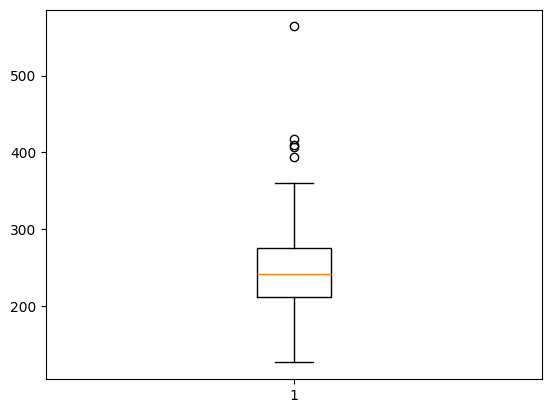

In [809]:
plt.boxplot(df['chol'])

In [810]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper and lower bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Replace outliers with upper or lower limit (capping)
df['chol'] = np.where(df['chol'] > upper_limit, upper_limit,np.where(df['chol'] < lower_limit, lower_limit, df['chol']))


(array([ 5.,  9., 35., 56., 65., 51., 33., 29., 12.,  8.]),
 array([126. , 150.5, 175. , 199.5, 224. , 248.5, 273. , 297.5, 322. ,
        346.5, 371. ]),
 <BarContainer object of 10 artists>)

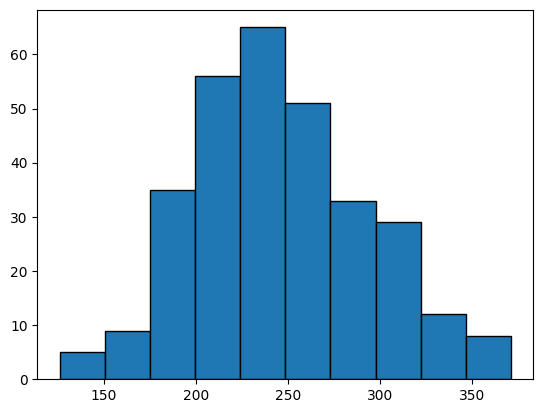

In [811]:
plt.hist(df['chol'], bins=10, edgecolor='black')

### fbs (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false) column

In [812]:
df['fbs'].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [813]:
df['fbs'].isna().sum()  


np.int64(0)

In [814]:
# df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0]).astype(np.int64)

In [815]:
df['fbs'].value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

(array([258.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  45.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

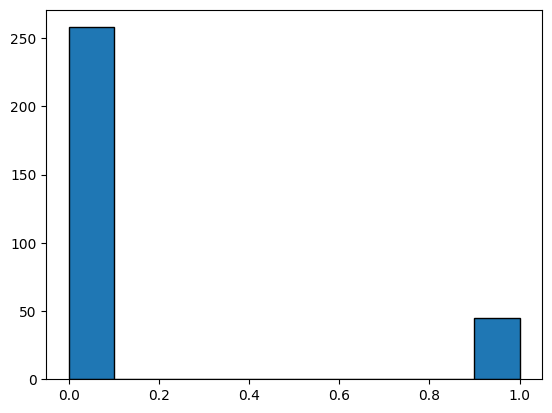

In [816]:
plt.hist(df['fbs'], bins=10, edgecolor='black')

### restecg (resting electrocardiographic results) column

In [817]:
df['restecg'].describe()

count    303.000000
mean       0.990099
std        0.994971
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: restecg, dtype: float64

In [818]:
df['restecg'].isna().sum()

np.int64(0)

In [819]:
df['restecg'].value_counts()

restecg
0    151
2    148
1      4
Name: count, dtype: int64

In [820]:
# df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0]).astype(np.int64)

([<matplotlib.patches.Wedge at 0x2e4adc0fd10>,
 [Text(0.005702386188599272, 1.099985219351495, '0'),
  Text(-0.051304162259203735, -1.0988029318011858, '2'),
  Text(1.0990541422312996, -0.04560693416819738, '1')],
 [Text(0.0031103924665086932, 0.599991937828088, '49.8%'),
  Text(-0.027984088505020217, -0.5993470537097377, '48.8%'),
  Text(0.5994840775807089, -0.024876509546289477, '1.3%')])

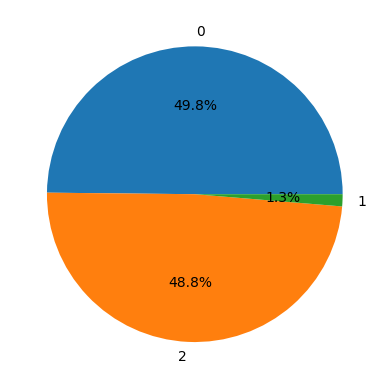

In [821]:
plt.pie(df['restecg'].value_counts().values, labels=df['restecg'].value_counts().index, autopct='%1.1f%%')    

        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

### thalach (maximum heart rate achieved) column

In [822]:
df['thalach'].describe()

count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [823]:
df['thalach'].isna().sum()

np.int64(0)

In [824]:
# df['thalach'] = df['thalach'].fillna(df['thalach'].mean()).astype(np.int64)


{'whiskers': [<matplotlib.lines.Line2D at 0x2e4ad52ef50>,
 'caps': [<matplotlib.lines.Line2D at 0x2e4ad52d750>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e4ad53acd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2e4ad511550>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e4ad510650>],
 'means': []}

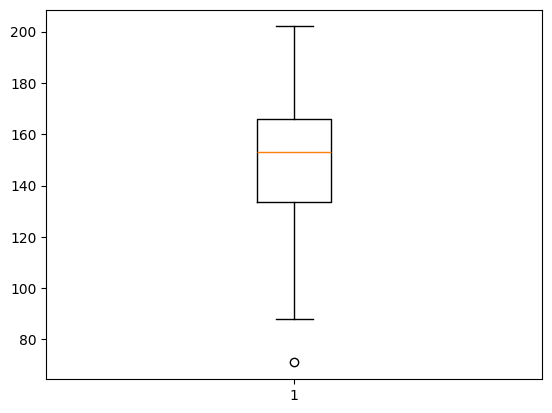

In [825]:
plt.boxplot(df['thalach'])

(array([ 1.,  6., 11., 26., 35., 53., 78., 62., 26.,  5.]),
 array([ 71. ,  84.1,  97.2, 110.3, 123.4, 136.5, 149.6, 162.7, 175.8,
        188.9, 202. ]),
 <BarContainer object of 10 artists>)

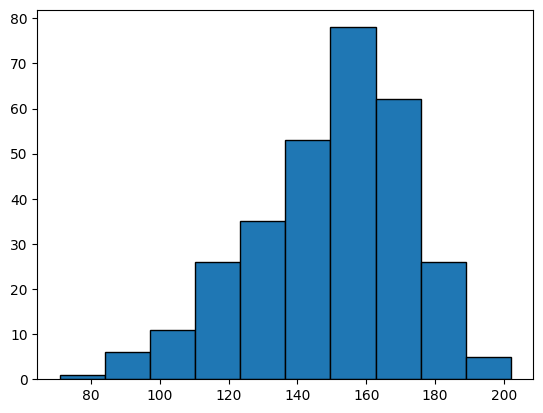

In [826]:
plt.hist(df['thalach'], bins=10, edgecolor='black')

### exang ( exercise induced angina (1 = yes; 0 = no) ) column

In [827]:
df['exang'].describe()  

count    303.000000
mean       0.326733
std        0.469794
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exang, dtype: float64

In [828]:
df['exang'].isna().sum()

np.int64(0)

In [829]:
df['exang'].value_counts()

exang
0    204
1     99
Name: count, dtype: int64

In [830]:
# df['exang'] = df['exang'].fillna(df['exang'].mode()[0]).astype(np.int64)
    

(array([204.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  99.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

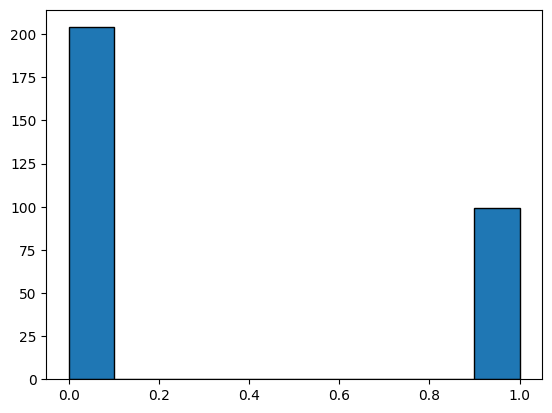

In [831]:
plt.hist(df['exang'], bins=10, edgecolor='black') 

### oldpeak (ST depression induced by exercise relative to rest) column 

In [832]:
df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

In [833]:
df['oldpeak'].isna().sum()

np.int64(0)

In [834]:
# df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean()).astype(np.float64)
# df.loc[df['oldpeak'] < 0, 'oldpeak'] = 0 

{'whiskers': [<matplotlib.lines.Line2D at 0x2e4aa9aae90>,
 'caps': [<matplotlib.lines.Line2D at 0x2e4aa9a9750>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e4aa9aa6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2e4aa8c9010>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e4aa97bbd0>],
 'means': []}

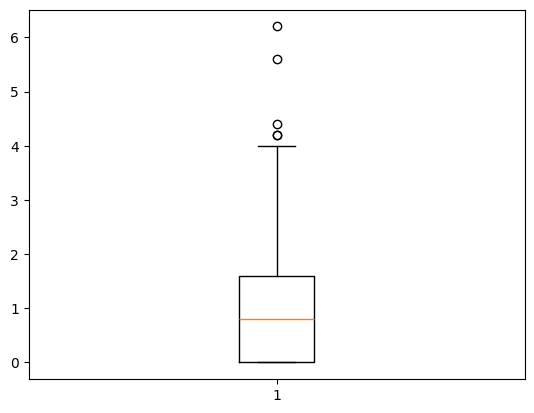

In [835]:
plt.boxplot(df['oldpeak'])

In [836]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper and lower bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Replace outliers with upper or lower limit (capping)
df['oldpeak'] = np.where(df['oldpeak'] > upper_limit, upper_limit,
                         np.where(df['oldpeak'] < lower_limit, lower_limit, df['oldpeak']))


(array([121.,  29.,  49.,  19.,  26.,  19.,  14.,   7.,   6.,  13.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

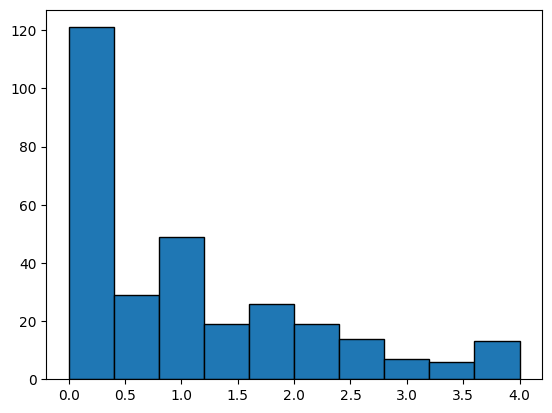

In [837]:
plt.hist(df['oldpeak'], bins=10, edgecolor='black')

### slope (the slope of the peak exercise ST segment) column


In [838]:
df['slope'].describe()

count    303.000000
mean       1.600660
std        0.616226
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: slope, dtype: float64

In [839]:
df['slope'].isna().sum()    

np.int64(0)

In [840]:
df['slope'].value_counts()

slope
1    142
2    140
3     21
Name: count, dtype: int64

In [841]:
# df['slope'] = df['slope'].fillna(df['slope'].mode()[0]).astype(np.float64)

([<matplotlib.patches.Wedge at 0x2e4ad3ffd10>,
 [Text(0.10817354033044684, 1.0946682078019703, '1'),
  Text(-0.34208707841634195, -1.0454551309265125, '2'),
  Text(1.0740282451082876, -0.23762013532024645, '3')],
 [Text(0.05900374927115281, 0.5970917497101655, '46.9%'),
  Text(-0.18659295186345923, -0.5702482532326432, '46.2%'),
  Text(0.585833588240884, -0.12961098290195258, '6.9%')])

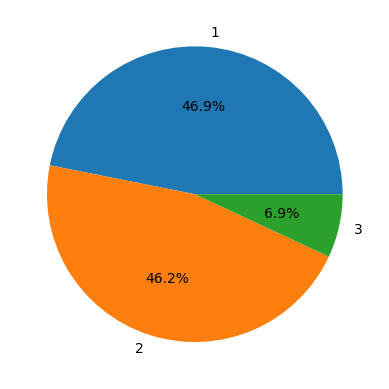

In [842]:
plt.pie(df['slope'].value_counts().values, labels=df['slope'].value_counts().index, autopct='%1.1f%%')

        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping

### ca (number of major vessels (0-3) colored by flourosopy) column 

In [843]:
df['ca'].describe()

count    299.000000
mean       0.672241
std        0.937438
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: ca, dtype: float64

In [844]:
df['ca'].isna().sum()

np.int64(4)

In [845]:
df['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [846]:
df['ca'] = df['ca'].fillna(df['ca'].mode()[0]).astype(np.float64)
    

([<matplotlib.patches.Wedge at 0x2e4aa801b10>,
 [Text(-0.32033623561759306, 1.0523234750542962, '0.0'),
  Text(-0.331229243419919, -1.0489457508867979, '1.0'),
  Text(0.7594621889362801, -0.7957494477384914, '2.0'),
  Text(1.0764343071031552, -0.2264711515653824, '3.0')],
 [Text(-0.1747288557914144, 0.5739946227568888, '59.4%'),
  Text(-0.18067049641086488, -0.5721522277564351, '21.5%'),
  Text(0.41425210305615273, -0.43404515331190435, '12.5%'),
  Text(0.58714598569263, -0.1235297190356631, '6.6%')])

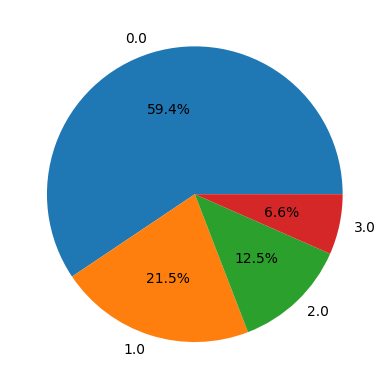

In [847]:
plt.pie(df['ca'].value_counts().values, labels=df['ca'].value_counts().index, autopct='%1.1f%%')

### thal  (thal: 3 = normal; 6 = fixed defect; 7 = reversable defect)  column

In [848]:
df['thal'].describe()

count    301.000000
mean       4.734219
std        1.939706
min        3.000000
25%        3.000000
50%        3.000000
75%        7.000000
max        7.000000
Name: thal, dtype: float64

In [849]:
df['thal'].isna().sum()

np.int64(2)

In [850]:
df['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64

In [851]:
df['thal'] = df['thal'].fillna(df['thal'].mode()[0]).astype(np.float64)


([<matplotlib.patches.Wedge at 0x2e4abec7390>,
 [Text(-0.18726803036256398, 1.083942196246703, '3.0'),
  Text(-0.017107070045787525, -1.0998669683895634, '7.0'),
  Text(1.0808988028529034, -0.20410237135114406, '6.0')],
 [Text(-0.10214619837958035, 0.591241197952747, '55.4%'),
  Text(-0.009331129115884103, -0.5999274373033981, '38.6%'),
  Text(0.5895811651924927, -0.11132856619153313, '5.9%')])

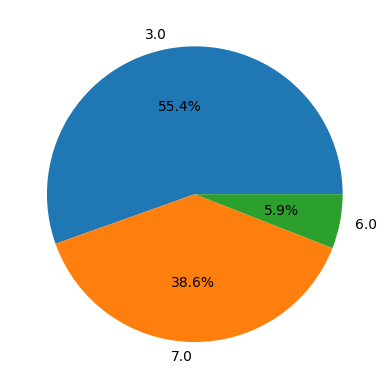

In [852]:
plt.pie(df['thal'].value_counts().values, labels=df['thal'].value_counts().index, autopct='%1.1f%%')

### end of EDA 

---------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Dimentionality reduction and Feature selection


In [853]:
X = df.drop(columns=['num'])
df['num'] = np.where(df['num']>0,1,0)
y = df['num']

<Axes: >

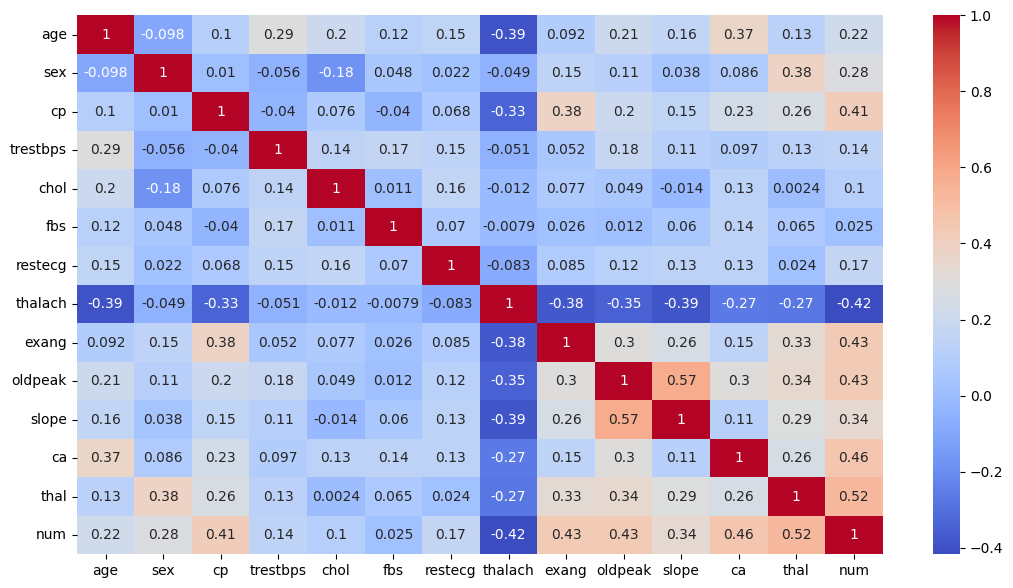

In [854]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


### PCA 


Explained variance ratio of 13 components: [7.20631851e-01 1.71400678e-01 8.70692155e-02 1.84268422e-02
 1.16669979e-03 3.59017150e-04 2.83472019e-04 2.54221565e-04
 2.00738775e-04 6.82746408e-05 5.57842830e-05 4.63665201e-05
 3.68384367e-05]
               PC1       PC2       PC3       PC4       PC5       PC6  \
age       0.040850 -0.178699  0.145344  0.971680 -0.000748 -0.015020   
sex      -0.001808 -0.000920 -0.001084 -0.005135  0.097944 -0.009645   
cp        0.001549 -0.013408 -0.005780 -0.005383  0.125311  0.179211   
trestbps  0.056883 -0.092673  0.979912 -0.166063 -0.015389 -0.007024   
chol      0.997481  0.022468 -0.060664 -0.028797  0.000234 -0.002504   
fbs       0.000117 -0.000406  0.003651  0.003318  0.009139  0.004724   
restecg   0.003470 -0.003993  0.006809  0.006536  0.004529  0.482855   
thalach  -0.009955  0.978583  0.121143  0.162349  0.029635  0.014383   
exang     0.000795 -0.007514 -0.000493 -0.006932  0.065381  0.061920   
oldpeak   0.001302 -0.017240  0.00831

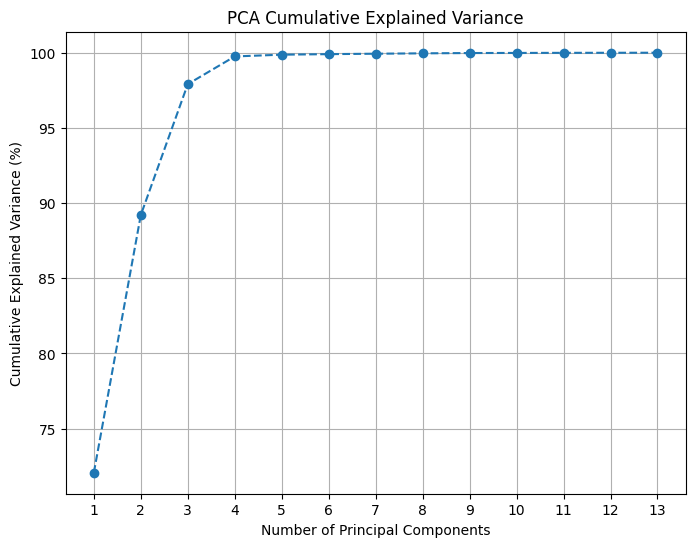

In [855]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=13)
X_pca = pca.fit(X)

print("Explained variance ratio of 13 components:", pca.explained_variance_ratio_)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100

# Loadings: correlation of each original feature with each principal component
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=X.columns)
print(loadings)



plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('PCA Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)
plt.show()


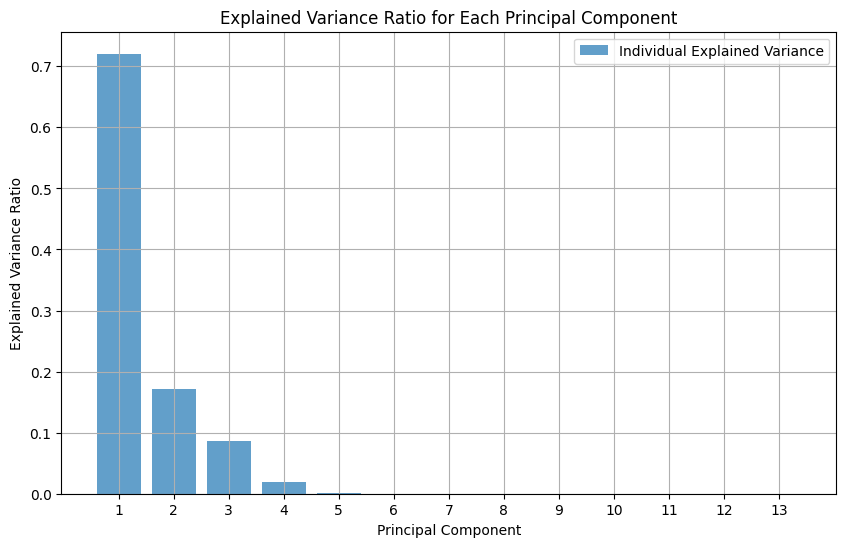

In [856]:

plt.figure(figsize=(10,6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [857]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Construct Parameter Grid
params = {'pca__n_components' : [1,2,3,4,5]} 

PCs = GridSearchCV(estimator=Pipe, param_grid=params, cv=5, scoring='accuracy')
PCs.fit(X, y)

print(f"Best Number of PCs components = {PCs.best_params_['pca__n_components']}\n") # best_params_ returns a dictionary data type

Best Number of PCs components = 5



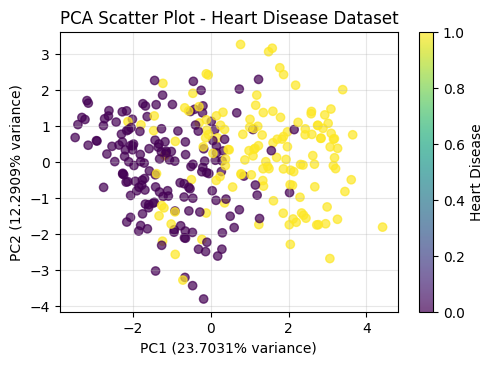

In [858]:
pca = PCA(n_components=5, random_state=42)
features_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=features_pca, columns=['PC1', 'PC2','PC3', 'PC4', 'PC5'])
pca_df['Target'] = y

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Basic scatter plot
plt.subplot(2, 2, 1)
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Target'], alpha=0.7)
plt.colorbar(scatter, label='Heart Disease')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.4%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.4%} variance)')
plt.title('PCA Scatter Plot - Heart Disease Dataset')
plt.grid(True, alpha=0.3)

### Feature selection using random forest and XGBoost


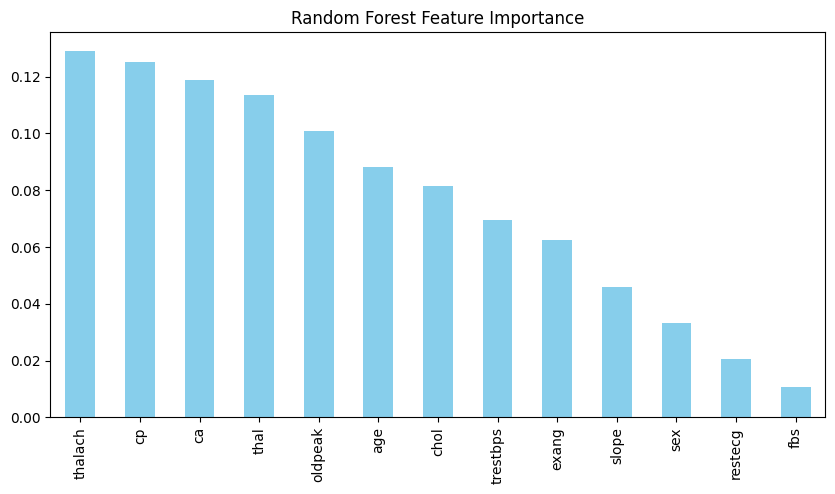

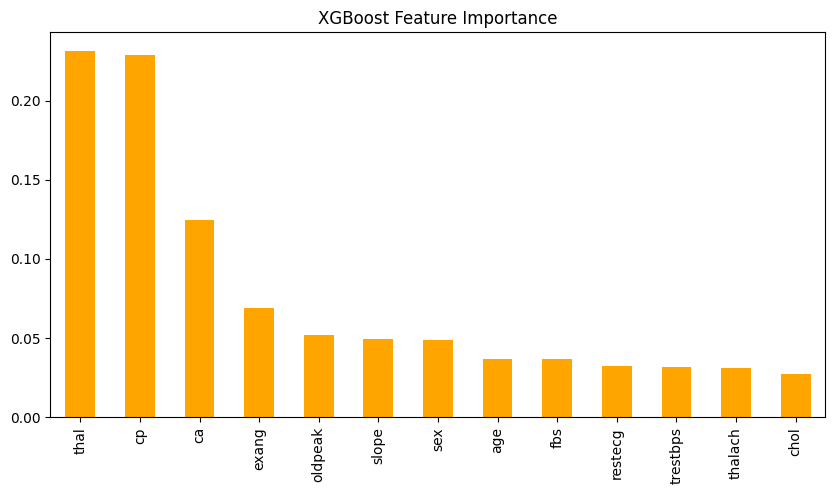

In [859]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# XGBoost feature importance
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X, y)
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot Random Forest importances
plt.figure(figsize=(10, 5))
rf_importances.plot(kind='bar', color='skyblue')
plt.title('Random Forest Feature Importance')
plt.show()

# Plot XGBoost importances
plt.figure(figsize=(10, 5))
xgb_importances.plot(kind='bar', color='orange')
plt.title('XGBoost Feature Importance')
plt.show()

### RFE for feature elimination using XGboost


In [860]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier( eval_metric='logloss')
xgb_model.fit(X, y)

rfe = RFE(estimator=xgb_model, n_features_to_select=13)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]

feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)

selected_feature_importances = feature_importances[selected_features]

selected_feature_importances = selected_feature_importances.sort_values(ascending=False)

print("Selected features with importance scores:")
print(selected_feature_importances)

Selected features with importance scores:
thal        0.231559
cp          0.228874
ca          0.124403
exang       0.069036
oldpeak     0.052039
slope       0.049645
sex         0.048629
age         0.036545
fbs         0.036517
restecg     0.032544
trestbps    0.031970
thalach     0.031035
chol        0.027203
dtype: float32


### Chi-Square Test to check feature significance

In [861]:
X_non_negative = X - np.min(X, axis=0)

chi2_selector = SelectKBest(chi2, k=13)
chi2_selector.fit(X_non_negative, y)

selected_features_chi2 = X.columns[chi2_selector.get_support()]

chi2_scores = chi2_selector.scores_

chi2_feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores
})

# Filter only selected feature rows and sort by score descending
selected_feature_scores = chi2_feature_scores[chi2_feature_scores['Feature'].isin(selected_features_chi2)]
selected_feature_scores = selected_feature_scores.sort_values(by='Chi2 Score', ascending=False)

print("Selected features by Chi-Square Test with scores:")
print(selected_feature_scores)

Selected features by Chi-Square Test with scores:
     Feature  Chi2 Score
7    thalach  349.853519
12      thal  179.511859
11        ca   84.115181
9    oldpeak   67.271884
4       chol   61.658361
0        age   48.283012
3   trestbps   47.112343
8      exang   38.052613
2         cp   22.154638
10     slope   21.968672
6    restecg    8.644897
1        sex    7.432845
5        fbs    0.164669


In [862]:
# 1. Intersection of feature names
intersection_features = list(set(selected_features) & set(selected_features_chi2))

# 2. Filter importance scores for intersection features
rfe_importances_intersect = selected_feature_importances[intersection_features]
chi2_scores_intersect = selected_feature_scores[selected_feature_scores['Feature'].isin(intersection_features)]

# 3. Normalize the scores to [0,1] range separately
rfe_norm = (rfe_importances_intersect - rfe_importances_intersect.min()) / (rfe_importances_intersect.max() - rfe_importances_intersect.min())
chi2_norm = (chi2_scores_intersect.set_index('Feature')['Chi2 Score'] - chi2_scores_intersect['Chi2 Score'].min()) / (chi2_scores_intersect['Chi2 Score'].max() - chi2_scores_intersect['Chi2 Score'].min())

# 4. Combine normalized scores into DataFrame
combined_scores = pd.DataFrame({
    'RFE Importance': rfe_norm,
    'Chi2 Score': chi2_norm
})

# 5. Calculate average score
combined_scores['Average Score'] = combined_scores.mean(axis=1)

# 6. Sort features by combined importance
combined_scores = combined_scores.sort_values(by='Average Score', ascending=False)

print("Intersected features ranked by combined importance scores:")
print(combined_scores)

Intersected features ranked by combined importance scores:
          RFE Importance  Chi2 Score  Average Score
thal            1.000000    0.512876       0.756438
cp              0.986863    0.062884       0.524874
thalach         0.018752    1.000000       0.509376
ca              0.475644    0.240072       0.357858
oldpeak         0.121534    0.191906       0.156720
exang           0.204708    0.108348       0.156528
age             0.045712    0.137603       0.091658
chol            0.000000    0.175853       0.087926
slope           0.109816    0.062353       0.086085
trestbps        0.023324    0.134256       0.078790
sex             0.104845    0.020785       0.062815
restecg         0.026137    0.024251       0.025194
fbs             0.045577    0.000000       0.022789


In [863]:
X = df.drop(columns=['num','chol','trestbps'])

In [864]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [865]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Supervised Learning


Training and evaluating Logistic Regression
--- Logistic Regression Classification Report ---
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Accuracy: 0.9016 | AUC: 0.9235
Training and evaluating Decision Tree
--- Decision Tree Classification Report ---
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.81      0.78      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

Accuracy: 0.7869 | AUC: 0.9235
Training and evaluating Random Forest
--- Random Forest Classification Report ---
              precision   

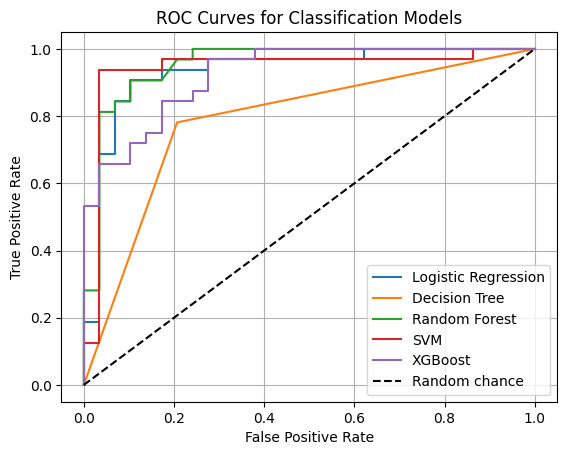

In [866]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

models = {
    'Logistic Regression': LogisticRegression(max_iter=100),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=200),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

# Train, predict, and evaluate models
for name, model in models.items():
    print(f"Training and evaluating {name}")
    if name in ['Logistic Regression', 'SVM', 'XGBoost']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)

    print(f"--- {name} Classification Report ---")
    print(classification_report(y_test, y_pred, zero_division=0))
    acc = accuracy_score(y_test, y_pred)

    print(f"Accuracy: {acc:.4f} | AUC: {auc:.4f}")

    # Plot ROC
    if len(set(y_test)) > 2:
        # For multiclass, compute ROC curves one-vs-rest for each class
        for i in range(y_proba.shape[1]):
            fpr, tpr, _ = roc_curve(y_test == i, y_proba[:, i])
            plt.plot(fpr, tpr, label=f'{name} class {i}')
    else:
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
        plt.plot(fpr, tpr, label=name)

plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curves for Classification Models')
plt.grid(True)
plt.show()


best accuracy is SVM at 95% accuracy 

# Unsupervised Learning 


# K-means 


K=2: WCSS=77097.46, Silhouette Score=0.479
K=3: WCSS=48817.49, Silhouette Score=0.399
K=4: WCSS=37850.11, Silhouette Score=0.356
K=5: WCSS=31088.15, Silhouette Score=0.336
K=6: WCSS=26184.54, Silhouette Score=0.351
K=7: WCSS=23326.79, Silhouette Score=0.346
K=8: WCSS=20717.92, Silhouette Score=0.318
K=9: WCSS=18532.34, Silhouette Score=0.324
K=10: WCSS=16353.65, Silhouette Score=0.330


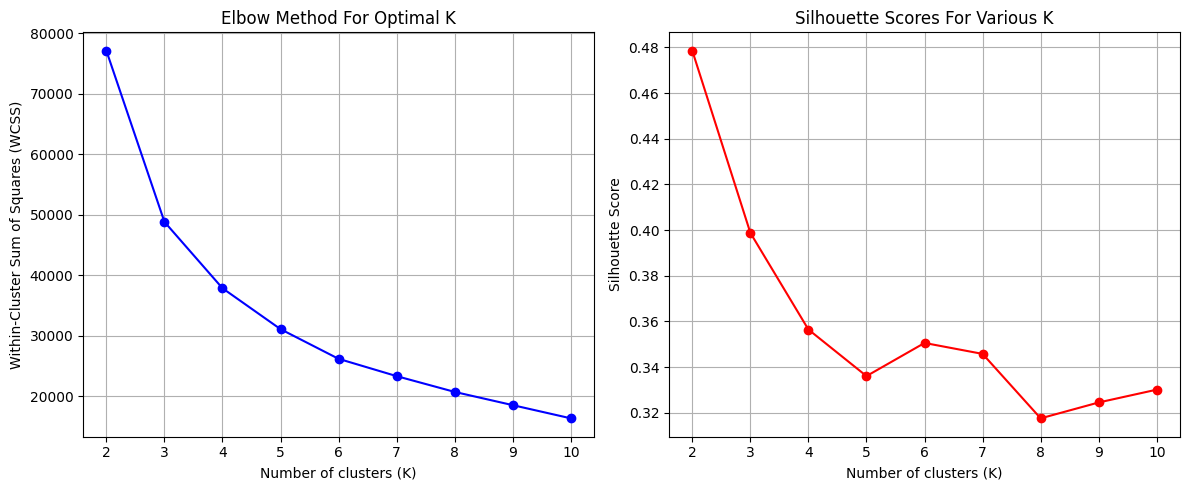

In [867]:
from sklearn.metrics import silhouette_score

# Define range of K values to test
k_range = range(2, 11)  
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []  # Silhouette scores

# Calculate WCSS and silhouette score for each K
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, max_iter=300, n_init=10)
    labels = kmeans.fit_predict(X)
    
    wcss.append(kmeans.inertia_)  # inertia_: sum of squared distances to cluster centers
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"K={k}: WCSS={kmeans.inertia_:.2f}, Silhouette Score={silhouette_avg:.3f}")

# Plot Elbow method graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-', markersize=6)
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)

# Plot Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-', markersize=6)
plt.title('Silhouette Scores For Various K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [868]:
# Fit final KMeans with optimal_k and assign clusters
optimal_k = 2
final_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, max_iter=300, n_init=10)
df['Cluster Label'] = final_kmeans.fit_predict(X)

# Calculate silhouette score
sil_score = silhouette_score(X, df['Cluster Label'])
print(f"Silhouette Score = {sil_score:.3f}")

# Display mean feature values per cluster
print(df.groupby('Cluster Label').mean(),'\n')

# Evaluate clustering quality
if sil_score >= 0.45:  # Above 0.45 is good
    print("Approved Score ---> Good Clustering\n")
elif sil_score >= 0.25:  # Above 0.25 is not that good but not bad though
    print("Approved Score ---> Not Bad Clustering\n")
else:  # Unacceptable
    print("Not Approved ----> Weak Clustering\n")

Silhouette Score = 0.479
                     age       sex        cp    trestbps        chol  \
Cluster Label                                                          
0              57.788618  0.739837  3.495935  132.186992  242.642276   
1              52.150000  0.638889  2.927778  130.772222  247.594444   

                    fbs   restecg     thalach     exang   oldpeak     slope  \
Cluster Label                                                                 
0              0.146341  1.089431  127.016260  0.552846  1.571545  1.878049   
1              0.150000  0.922222  165.044444  0.172222  0.650556  1.411111   

                     ca      thal       num  
Cluster Label                                
0              0.951220  5.455285  0.707317  
1              0.466667  4.222222  0.288889   

Approved Score ---> Good Clustering



#  Hierarchical Clustering 


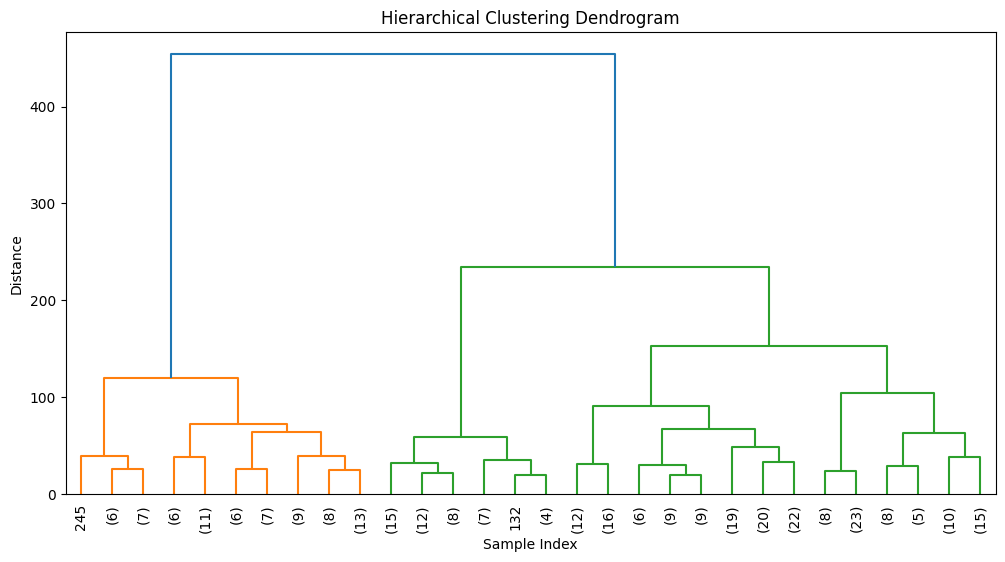

                     age       sex        cp    trestbps        chol  \
Cluster Label                                                          
0              53.004367  0.663755  3.017467  131.069869  246.445415   
1              58.878378  0.729730  3.594595  132.202703  242.918919   

                    fbs   restecg     thalach     exang   oldpeak     slope  \
Cluster Label                                                                 
0              0.152838  0.938865  159.991266  0.240175  0.849782  1.502183   
1              0.135135  1.148649  117.472973  0.594595  1.564865  1.905405   

                     ca      thal       num  
Cluster Label                                
0              0.532751  4.528384  0.366812  
1              1.067568  5.324324  0.743243  


In [869]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute linkage matrix for dendrogram
linkage_matrix = linkage(X, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12, 6))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.show()

# Perform Agglomerative Clustering with the fixed parameters
n_clusters = 2
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', metric='euclidean')
labels = agg_cluster.fit_predict(X)

# Add cluster labels to dataframe
df['Cluster Label'] = labels

# Display means per cluster
print(df.groupby('Cluster Label').mean())


In [870]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# Evaluate clustering quality with multiple metrics
sil_score = silhouette_score(X, labels)
db_score = davies_bouldin_score(X, labels)
ch_score = calinski_harabasz_score(X, labels)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")
print(f"Calinski-Harabasz Index: {ch_score:.3f}")

Silhouette Score: 0.503
Davies-Bouldin Index: 0.669
Calinski-Harabasz Index: 377.821


In [871]:
# Evaluate clustering quality with silhouette score interpretation
if sil_score >= 0.70:
    print("Excellent clustering - strong structure found (silhouette score >= 0.70)\n")
elif sil_score >= 0.50:
    print("Good clustering - reasonable structure found (silhouette score >= 0.50)\n")
elif sil_score >= 0.25:
    print("Fair clustering - weak structure, consider review (silhouette score >= 0.25)\n")
else:
    print("Poor clustering - no substantial structure detected (silhouette score < 0.25)\n")


# Evaluate Davies-Bouldin Index with interpretation
if db_score < 0.5:
    print(f"Davies-Bouldin Index: {db_score:.3f} - Excellent clustering")
elif db_score < 1.0:
    print(f"Davies-Bouldin Index: {db_score:.3f} - Good clustering")
else:
    print(f"Davies-Bouldin Index: {db_score:.3f} - Poor clustering")

# Evaluate Calinski-Harabasz Index with interpretation (relative scale)
if ch_score > 1000:
    print(f"Calinski-Harabasz Index: {ch_score:.1f} - Very good clustering")
elif ch_score > 300:
    print(f"Calinski-Harabasz Index: {ch_score:.1f} - Good clustering")
else:
    print(f"Calinski-Harabasz Index: {ch_score:.1f} - Weak clustering")

Good clustering - reasonable structure found (silhouette score >= 0.50)

Davies-Bouldin Index: 0.669 - Good clustering
Calinski-Harabasz Index: 377.8 - Good clustering


# Clustering models with visualized results 


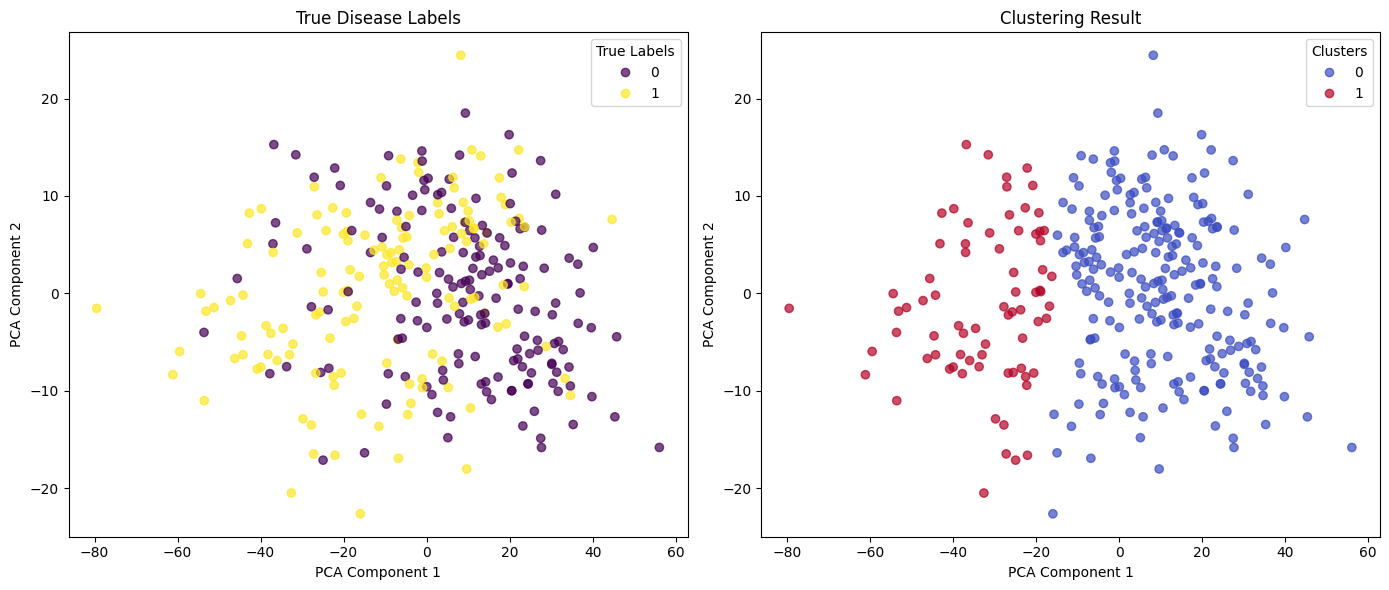

In [872]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot true labels
scatter1 = axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=true_labels, cmap='viridis', alpha=0.7)
axes[0].set_title("True Disease Labels")
axes[0].set_xlabel("PCA Component 1")
axes[0].set_ylabel("PCA Component 2")
legend1 = axes[0].legend(*scatter1.legend_elements(), title="True Labels")

# Plot cluster labels
scatter2 = axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=pred_labels, cmap='coolwarm', alpha=0.7)
axes[1].set_title("Clustering Result")
axes[1].set_xlabel("PCA Component 1")
axes[1].set_ylabel("PCA Component 2")
legend2 = axes[1].legend(*scatter2.legend_elements(), title="Clusters") 

plt.tight_layout()
plt.show()

# Hyperparameter tuning 

In [873]:
baseline_svm = SVC(random_state=42,probability=True)
baseline_svm.fit(X_train_scaled, y_train)
y_pred_baseline = baseline_svm.predict(X_test_scaled)

baseline_acc = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline SVM Accuracy: {baseline_acc:.4f}")


Baseline SVM Accuracy: 0.9508


### GridSearchCV hyperparameter tuning

In [874]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.stats import uniform

# Baseline SVM without tuning
baseline_svm = SVC(random_state=42,probability=True)
baseline_svm.fit(X_train_scaled, y_train)
y_pred_baseline = baseline_svm.predict(X_test_scaled)
baseline_acc = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline SVM Accuracy: {baseline_acc:.4f}")

# Grid search parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_grid_svm = grid_search.best_estimator_
y_pred_grid = best_grid_svm.predict(X_test)
grid_acc = accuracy_score(y_test, y_pred_grid)
print(f"GridSearchCV Best Accuracy: {grid_acc:.4f}")
print(f"GridSearchCV Best Parameters: {grid_search.best_params_}")

# Randomized search parameter distribution
param_dist = {
    'C': uniform(0.1, 100),
    'gamma': ['scale', 'auto'] + list(np.logspace(-4, 1, 20)),
    'kernel': ['linear', 'rbf', 'poly']
}

random_search = RandomizedSearchCV(
    SVC(random_state=42),
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=2
)
random_search.fit(X_train, y_train)
best_random_svm = random_search.best_estimator_
y_pred_random = best_random_svm.predict(X_test)
random_acc = accuracy_score(y_test, y_pred_random)
print(f"RandomizedSearchCV Best Accuracy: {random_acc:.4f}")
print(f"RandomizedSearchCV Best Parameters: {random_search.best_params_}")

# Deliverable: compare and print best model
print("\nComparison of Models:")
print(f"Baseline Accuracy: {baseline_acc:.4f}")
print(f"Grid Search Accuracy: {grid_acc:.4f} with params: {grid_search.best_params_}")
print(f"Randomized Search Accuracy: {random_acc:.4f} with params: {random_search.best_params_}")

# Select overall best performing model
best_model = best_grid_svm if grid_acc >= random_acc else best_random_svm
print(f"\nBest performing model with optimized hyperparameters:\n{best_model}")


Baseline SVM Accuracy: 0.9508
Fitting 5 folds for each of 60 candidates, totalling 300 fits


KeyboardInterrupt: 